<a href="https://colab.research.google.com/github/J-o-y-y/ms_ai_school/blob/main/20230531_%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 시계열 데이터 구성요소 3가지
1.1 상향
1.2 하향
1.3 평평한 추세

2. 시계열 데이터 탐색 및 시각화
2.1 기본 선 그래프
2.2 산점도
2.3 막대 그래프
2.4 박스 플롯
2.5 히스토그램
2.6 히트맵

3. 시계열 분해
3.1 추세
3.2 계절성
3.3 주기
3.4 불규칙성 요소

4. 데이터셋에서 결측치의 위치 확인

5. 시계열 데이터 전처리

6. 선형 보간 - pandas를 활용한 선형 보간

7. 스플라인 보간법

8. Pandas를 활용한 최근접 이웃 보간

9. 시계열 데이터에서 결측치를 평균값으로 대체한 후 시각화

10. ARIMA 모델을 활용하여 결측치 예측과 대체


시계열 데이터 구성요소 3가지

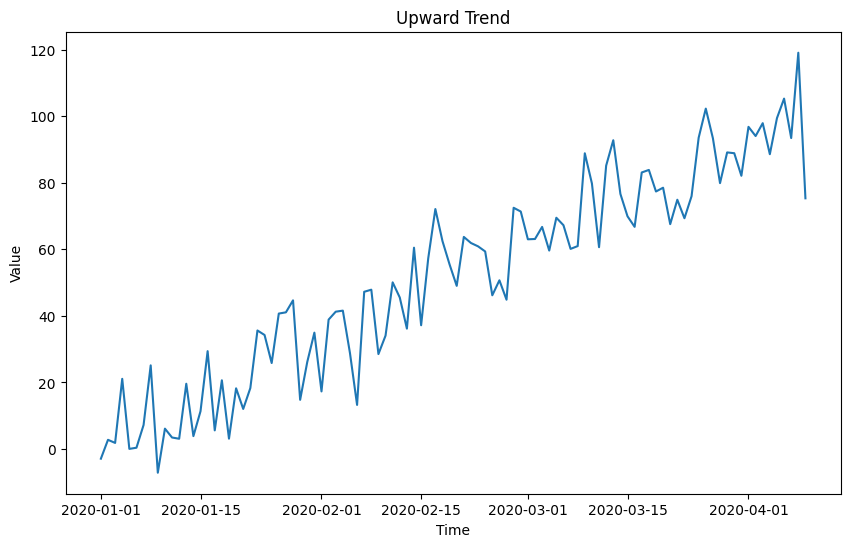

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 날짜 인덱스 생성
dates = pd.date_range(start='1/1/2020', periods=100)

# 상향 추세를 가지는 임의의 데이터 생성
data = np.arange(1, 101) + np.random.randn(100)*10

# 시계열 데이터로 변환
time_series_data = pd.Series(data, index=dates)

# 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(time_series_data)
plt.title('Upward Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


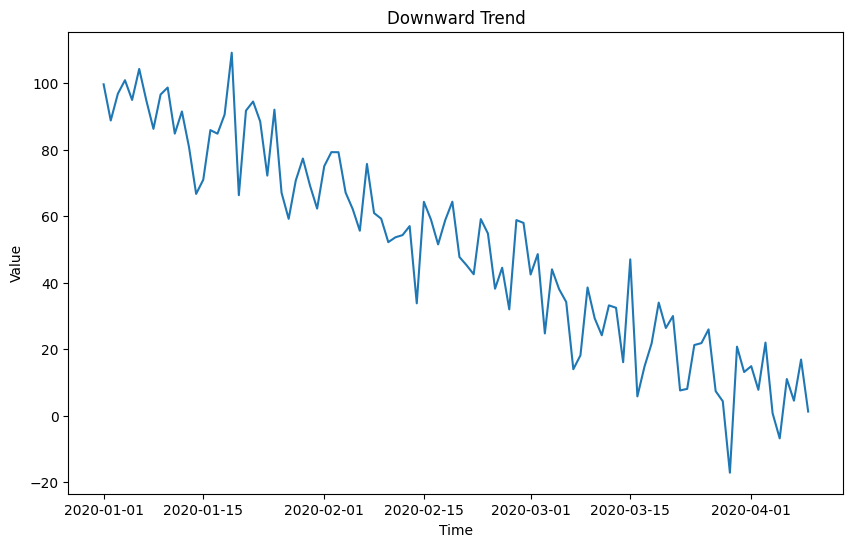

In [3]:

# 날짜 인덱스 생성
dates = pd.date_range(start='1/1/2020', periods=100)

# 하향 추세를 가지는 임의의 데이터 생성
data = np.arange(100, 0, -1) + np.random.randn(100)*10

# 시계열 데이터로 변환
time_series_data = pd.Series(data, index=dates)

# 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(time_series_data)
plt.title('Downward Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


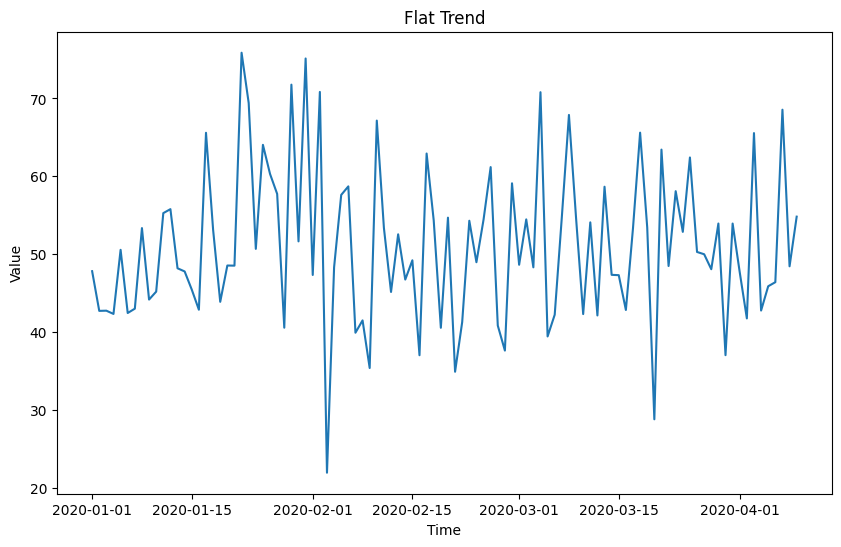

In [4]:


# 날짜 인덱스 생성
dates = pd.date_range(start='1/1/2020', periods=100)

# 평평한 추세를 가지는 임의의 데이터 생성
data = np.full(100, 50) + np.random.randn(100)*10

# 시계열 데이터로 변환
time_series_data = pd.Series(data, index=dates)

# 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(time_series_data)
plt.title('Flat Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


시계열 데이터 탐색 및 시각화

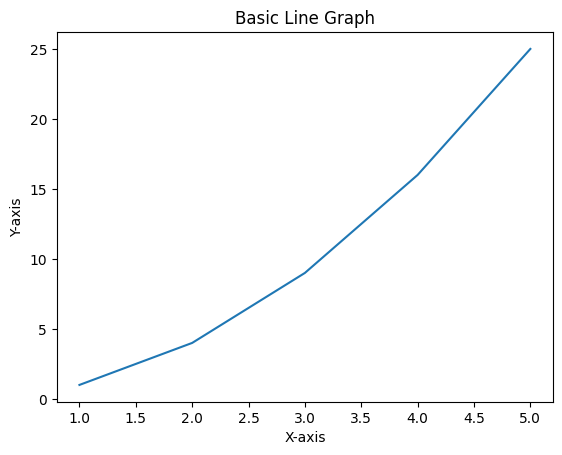

In [5]:

# 임의의 데이터
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# 선 그래프 그리기
plt.plot(x, y)

# 그래프 제목 설정
plt.title('Basic Line Graph')

# x, y 축 라벨 설정
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 그래프 보여주기
plt.show()


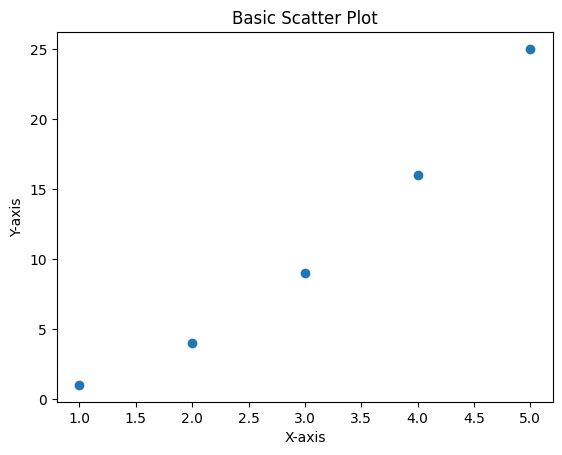

In [6]:


# 임의의 데이터
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# 산점도 그리기
plt.scatter(x, y)

# 그래프 제목 설정
plt.title('Basic Scatter Plot')

# x, y 축 라벨 설정
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 그래프 보여주기
plt.show()


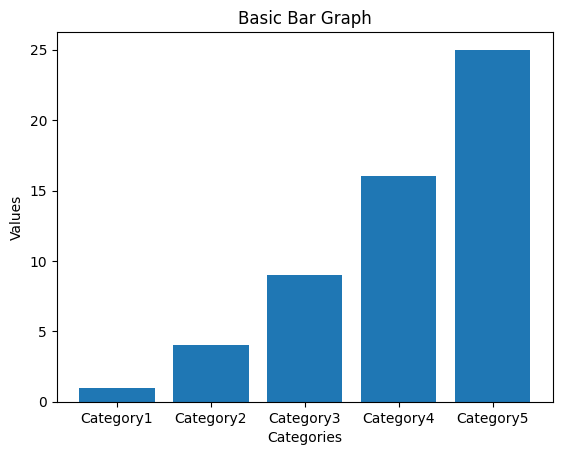

In [7]:


# 임의의 데이터
categories = ['Category1', 'Category2', 'Category3', 'Category4', 'Category5']
values = [1, 4, 9, 16, 25]

# 막대 그래프 그리기
plt.bar(categories, values)

# 그래프 제목 설정
plt.title('Basic Bar Graph')

# x, y 축 라벨 설정
plt.xlabel('Categories')
plt.ylabel('Values')

# 그래프 보여주기
plt.show()


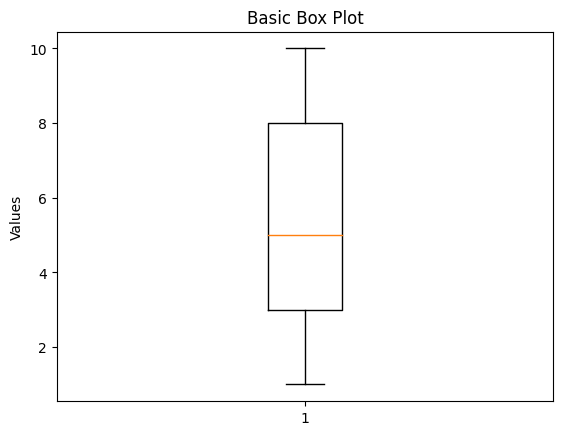

In [8]:


# 임의의 데이터
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 5, 7, 10, 1, 4, 5, 7, 8, 9]

# 박스 플롯 그리기
plt.boxplot(data)

# 그래프 제목 설정
plt.title('Basic Box Plot')

# y축 라벨 설정
plt.ylabel('Values')

# 그래프 보여주기
plt.show()


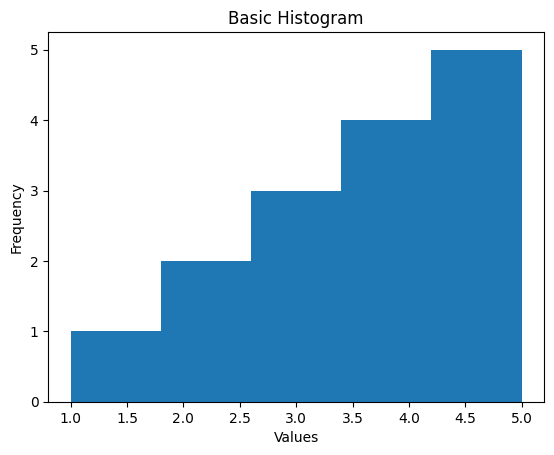

In [9]:


# 임의의 데이터
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# 히스토그램 그리기
plt.hist(data, bins=5)

# 그래프 제목 설정
plt.title('Basic Histogram')

# x, y 축 라벨 설정
plt.xlabel('Values')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()


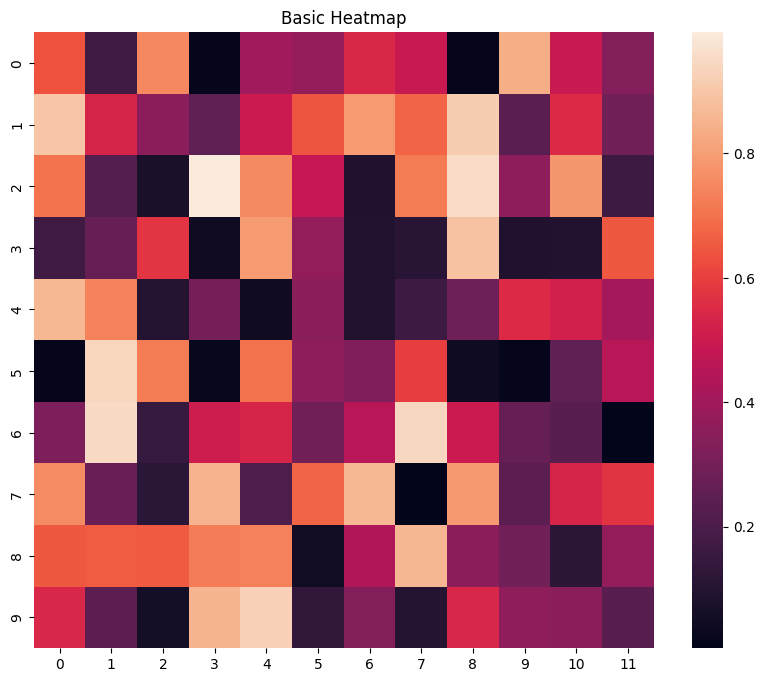

In [10]:

import seaborn as sns


# 임의의 데이터 생성
data = np.random.rand(10, 12)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(data)

# 그래프 제목 설정
plt.title('Basic Heatmap')

# 그래프 보여주기
plt.show()


시계열 분해

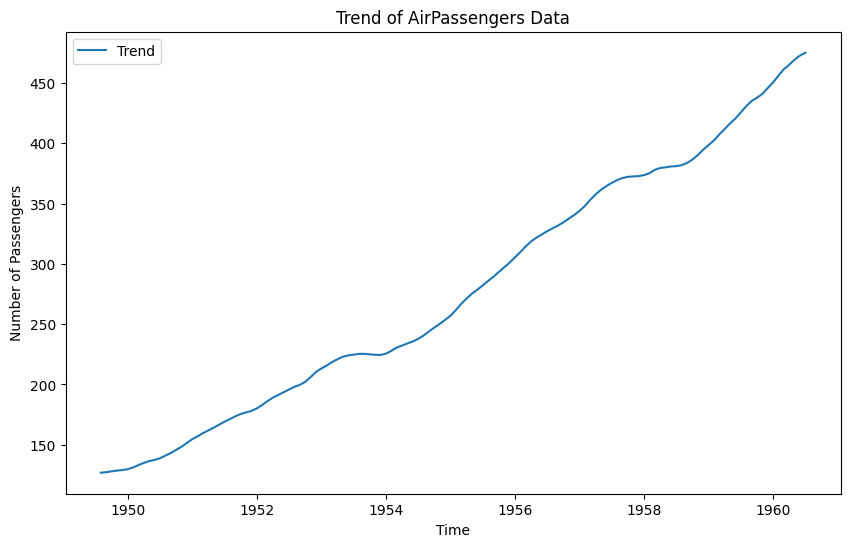

In [15]:
import statsmodels.api as sm

# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 시계열 분해
decomposition = sm.tsa.seasonal_decompose(data['value'], model='multiplicative')

# 추세 성분
trend = decomposition.trend

# 추세 그래프 출력
plt.figure(figsize=(10,6))
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.show()

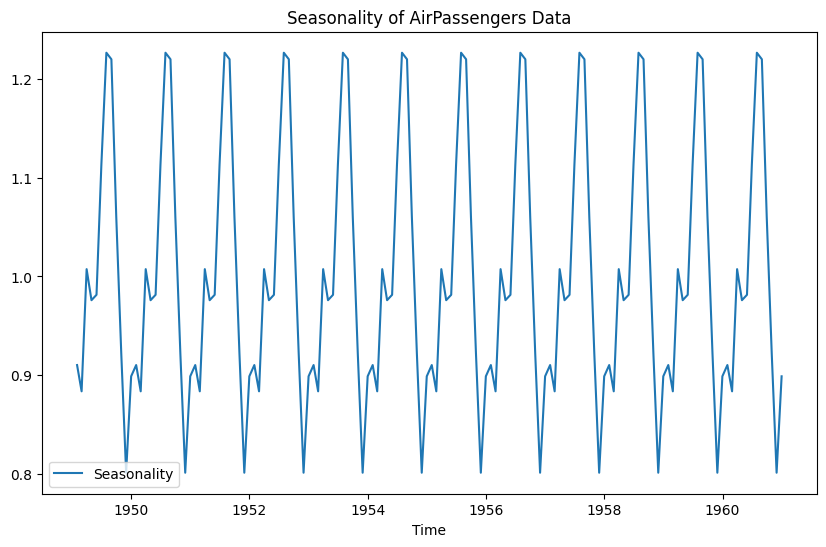

In [16]:
# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 시계열 분해
decomposition = sm.tsa.seasonal_decompose(data['value'], model='multiplicative')

# 계절성 성분
seasonal = decomposition.seasonal

# 계절성 그래프 출력
plt.figure(figsize=(10,6))
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality of AirPassengers Data')
plt.xlabel('Time')
plt.show()

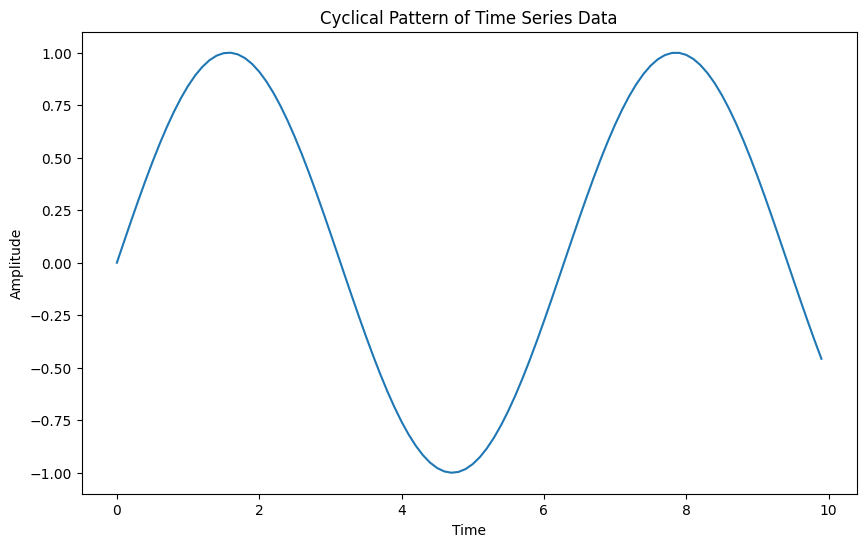

In [17]:


# 시간 배열 생성
time = np.arange(0, 10, 0.1)

# 사인 함수를 따르는 시계열 데이터 생성
amplitude = np.sin(time)

# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(time, amplitude)

plt.title('Cyclical Pattern of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


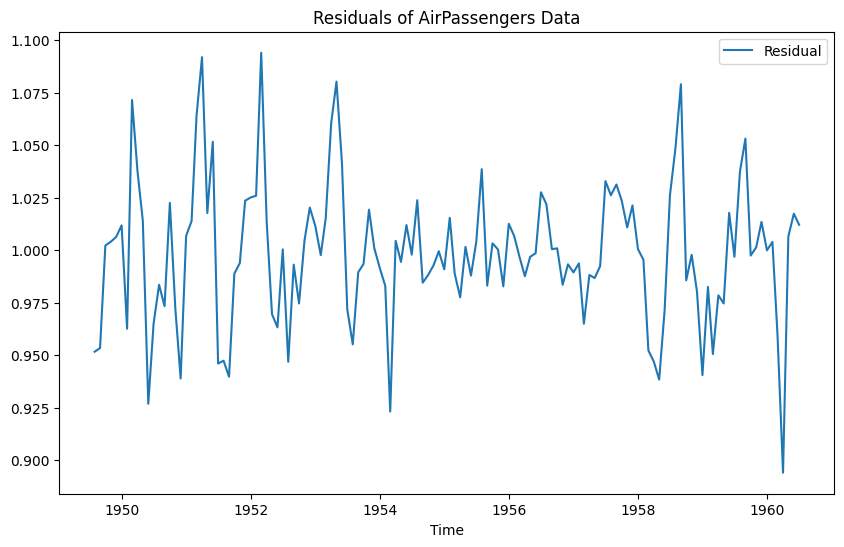

In [18]:


# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 시계열 분해
decomposition = sm.tsa.seasonal_decompose(data['value'], model='multiplicative')

# 불규칙성 요소(잔차)
residual = decomposition.resid

# 불규칙성 요소 그래프 출력
plt.figure(figsize=(10,6))
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residuals of AirPassengers Data')
plt.xlabel('Time')
plt.show()


데이터셋에서 결측치의 위치 확인

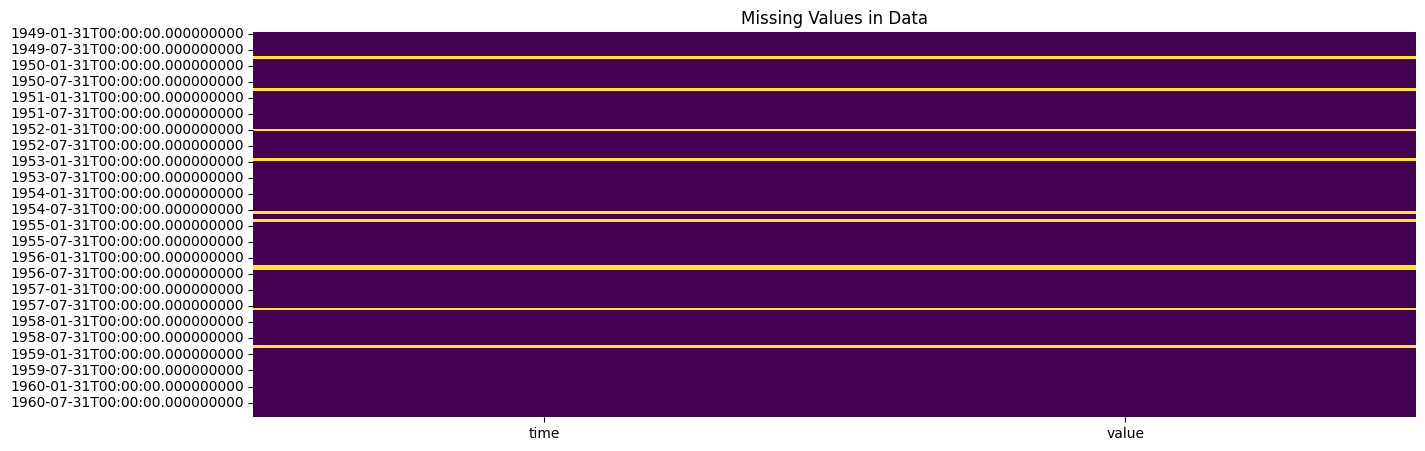

In [19]:


# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 데이터에 임의로 결측치 추가 (예시용)
np.random.seed(0) # 일관된 결과를 위해 시드 설정
missing_values = np.random.randint(0, len(data), size=10) # 결측치를 추가할 위치 랜덤 선택
data.iloc[missing_values] = np.nan # 선택한 위치에 결측치 추가

# 결측치 위치를 가리키는 데이터프레임 생성
missing_df = data.isnull()

# 결측치 위치 시각화
plt.figure(figsize=(15, 5))
sns.heatmap(missing_df, cbar=False, cmap='viridis')
plt.title('Missing Values in Data')
plt.show()


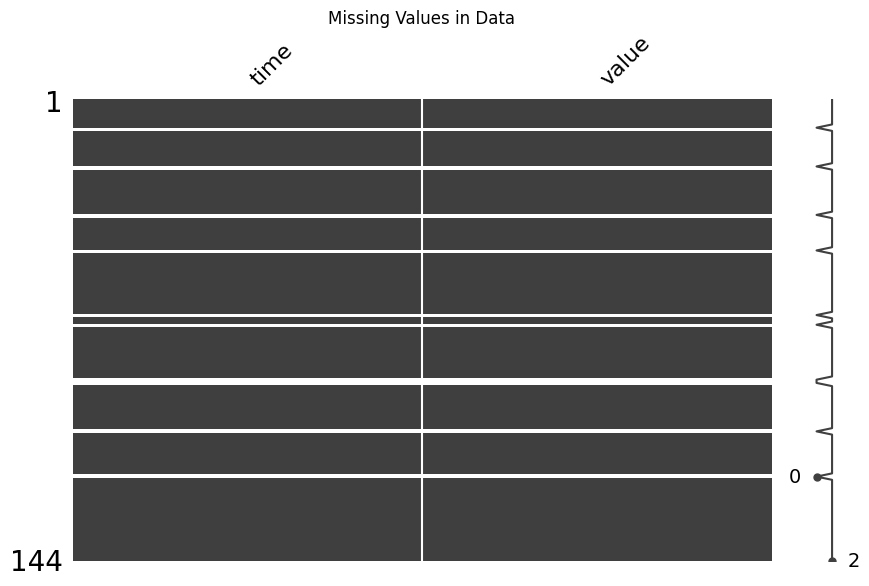

In [20]:
import missingno as msno

# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 데이터에 임의로 결측치 추가 (예시용)
np.random.seed(0) # 일관된 결과를 위해 시드 설정
missing_values = np.random.randint(0, len(data), size=10) # 결측치를 추가할 위치 랜덤 선택
data.iloc[missing_values] = np.nan # 선택한 위치에 결측치 추가

# 결측치를 시각화
msno.matrix(data, figsize=(10, 6))
plt.title('Missing Values in Data')
plt.show()

시계열 데이터 전처리

In [21]:

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 1. 결측치 처리: 평균 값으로 채우기
# 임의로 결측치를 추가했다고 가정하고 처리합니다.
np.random.seed(0)
missing_values = np.random.randint(0, len(data), size=10)
data.iloc[missing_values] = np.nan
data = data.fillna(data.mean())

# 2. 이상치 처리: IQR을 이용한 이상치 검출 후, 이상치는 평균 값으로 대체
Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR
outliers = data[(data['value'] < Q1 - outlier_step) | (data['value'] > Q3 + outlier_step)]
data.loc[outliers.index, 'value'] = data.mean()

# 3. 시간 단위 변경: 월별에서 분기별로 변경
data = data.resample('Q').mean()

# 4. 데이터 스케일링: Min-Max 스케일링
scaler = MinMaxScaler()
data['value'] = scaler.fit_transform(data[['value']])


선형보간

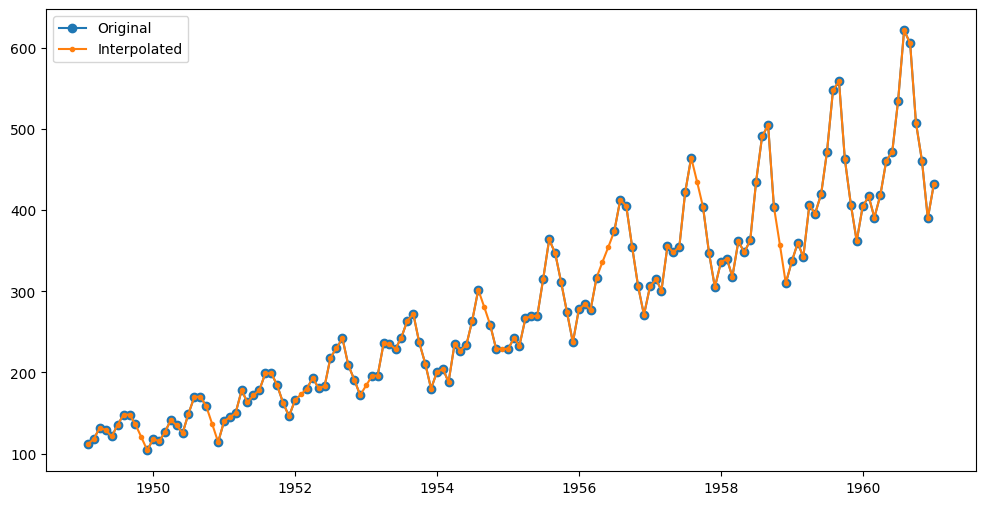

In [22]:


# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 데이터에 임의로 결측치 추가 (예시용)
np.random.seed(0) 
missing_values = np.random.randint(0, len(data), size=10) 
data.iloc[missing_values] = np.nan 

# 선형 보간
data_interpolated = data.interpolate()

# 원래 데이터와 보간된 데이터 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], marker='o', label='Original')
plt.plot(data_interpolated.index, data_interpolated['value'], marker='.', label='Interpolated')
plt.legend()
plt.show()


스플라인 보간법 (원본 데이터를 파란색으로, 보간된 데이터를 빨간색)

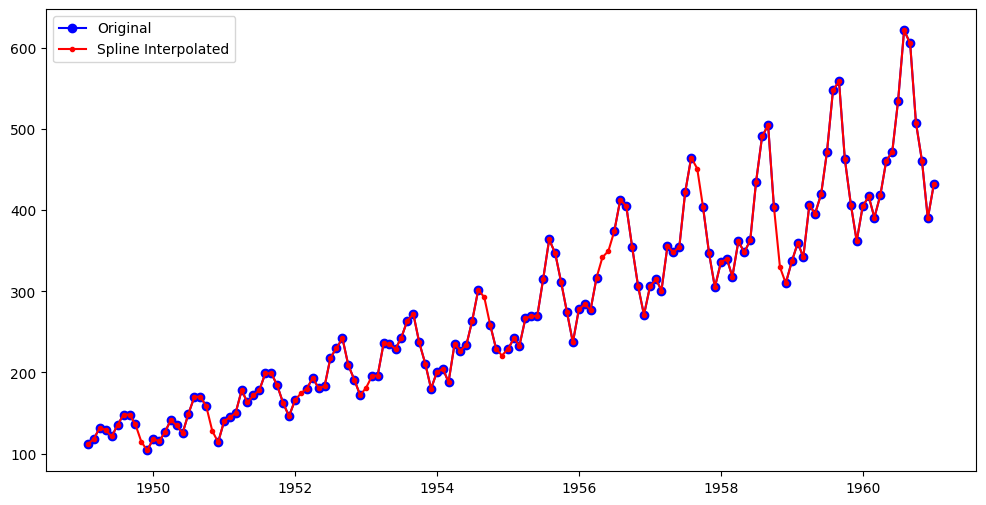

In [24]:


# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 데이터에 임의로 결측치 추가 (예시용)
np.random.seed(0) 
missing_values = np.random.randint(0, len(data), size=10) 
data.iloc[missing_values] = np.nan 

# 스플라인 보간
data_spline_interpolated = data.interpolate(method='spline', order=2)

# 원래 데이터와 보간된 데이터 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], marker='o', color='blue', label='Original')
plt.plot(data_spline_interpolated.index, data_spline_interpolated['value'], marker='.', color='red', label='Spline Interpolated')
plt.legend()
plt.show()


Pandas를 활용한 최근접 이웃 보간

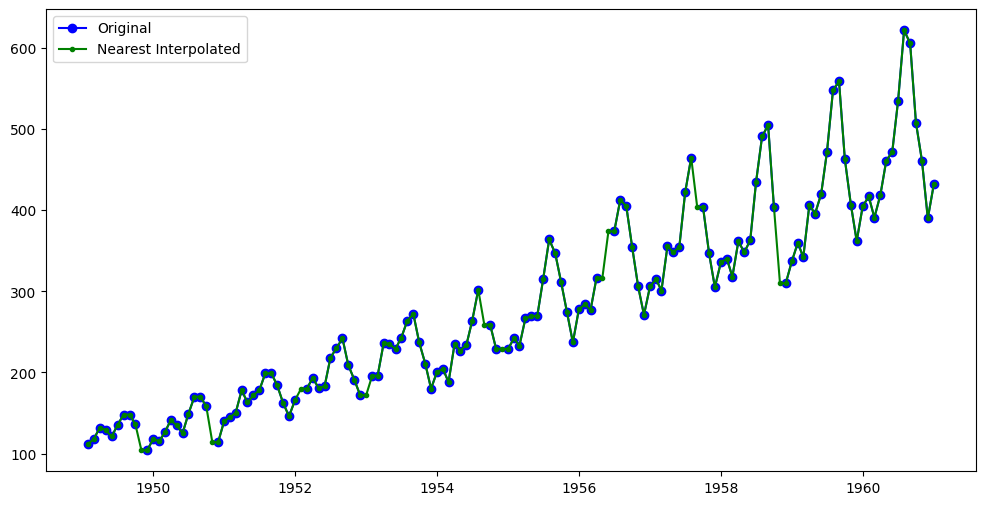

In [25]:


# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 데이터에 임의로 결측치 추가 (예시용)
np.random.seed(0) 
missing_values = np.random.randint(0, len(data), size=10) 
data.iloc[missing_values] = np.nan 

# 최근접 이웃 보간
data_nearest_interpolated = data.interpolate(method='nearest')

# 원래 데이터와 보간된 데이터 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], marker='o', color='blue', label='Original')
plt.plot(data_nearest_interpolated.index, data_nearest_interpolated['value'], marker='.', color='green', label='Nearest Interpolated')
plt.legend()
plt.show()


시계열 데이터에서 결측치를 평균값으로 대체한 후 시각화

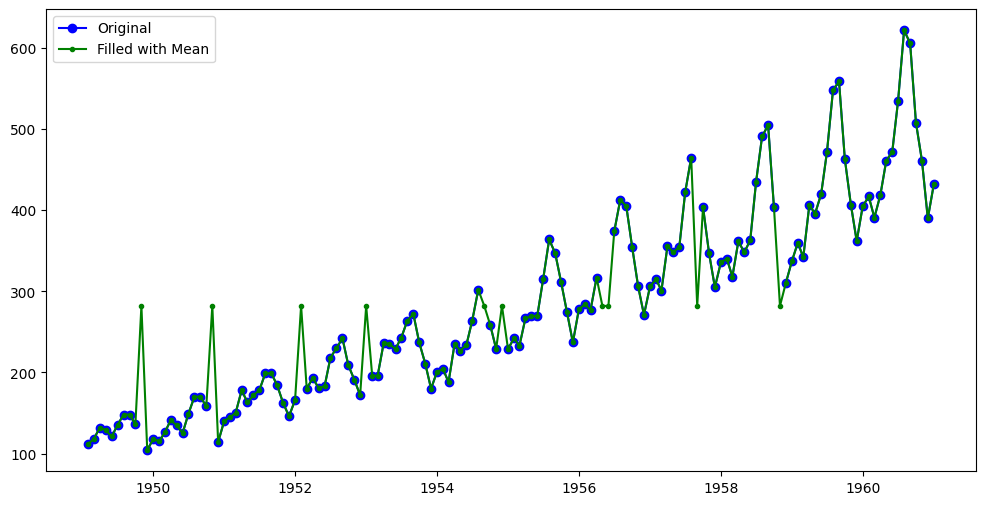

In [26]:


# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 데이터에 임의로 결측치 추가 (예시용)
np.random.seed(0) 
missing_values = np.random.randint(0, len(data), size=10) 
data.iloc[missing_values] = np.nan 

# 결측치 평균값으로 대체
data_filled = data.fillna(data.mean())

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], marker='o', color='blue', label='Original')
plt.plot(data_filled.index, data_filled['value'], marker='.', color='green', label='Filled with Mean')
plt.legend()
plt.show()


ARIMA 모델을 활용하여 결측치 예측과 대체

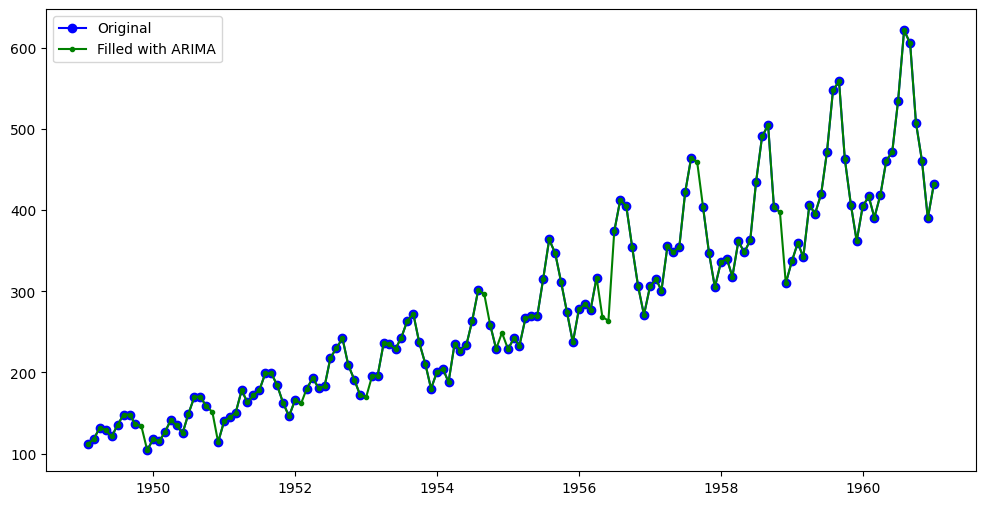

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 로드
data = sm.datasets.get_rdataset('AirPassengers').data

# 월별 시간 인덱스 설정
data.index = pd.date_range(start='1949-01', periods=len(data), freq='M')

# 데이터에 임의로 결측치 추가 (예시용)
np.random.seed(0)
missing_values = np.random.randint(0, len(data), size=10)
data.iloc[missing_values] = np.nan

# 결측치 예측 및 대체
filled_data = data.copy()
missing_indices = filled_data['value'].isnull()
missing_dates = filled_data.index[missing_indices]

for date in missing_dates:
    train_data = filled_data.loc[:date - pd.DateOffset(months=1)]
    model = sm.tsa.ARIMA(train_data['value'], order=(1, 0, 0))
    model_fit = model.fit()
    predicted_value = model_fit.get_prediction(start=date, end=date)
    filled_data.loc[date, 'value'] = predicted_value.predicted_mean[0]

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], marker='o', color='blue', label='Original')
plt.plot(filled_data.index, filled_data['value'], marker='.', color='green', label='Filled with ARIMA')
plt.legend()
plt.show()
